In [1]:
# dependencies

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
from matplotlib import figure
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, column

In [4]:
# create engine to hawaii.sqlite

engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB

session = Session(engine)

Inspect and view data from measurement and station tables

In [9]:
inspector = inspect(engine)

In [10]:
# inspect measurement table

m_col = inspector.get_columns("Measurement")
for col in m_col:
    print(col["name"], col["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# inspect station table

s_col = inspector.get_columns("Station")
for col1 in s_col:
    print(col1["name"], col1["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
# view the last 10 entries in measurement table

m_view= engine.execute('SELECT * FROM Measurement order by date desc limit 10').fetchall()
m_view

[(2724, 'USC00519397', '2017-08-23', 0.0, 81.0),
 (7635, 'USC00514830', '2017-08-23', 0.0, 82.0),
 (12187, 'USC00519523', '2017-08-23', 0.08, 82.0),
 (19550, 'USC00516128', '2017-08-23', 0.45, 76.0),
 (2723, 'USC00519397', '2017-08-22', 0.0, 82.0),
 (12186, 'USC00519523', '2017-08-22', 0.0, 82.0),
 (19549, 'USC00516128', '2017-08-22', 0.5, 76.0),
 (2722, 'USC00519397', '2017-08-21', 0.0, 81.0),
 (7634, 'USC00514830', '2017-08-21', 0.02, 79.0),
 (12185, 'USC00519523', '2017-08-21', None, 82.0)]

In [13]:
# view the station table

s_view= engine.execute('SELECT * FROM Station').fetchall()
s_view

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.

most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent_date)

('2017-08-23',)


The most recent date in the data set is 23/08/2017

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

previous_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
previous_year

datetime.date(2016, 8, 23)

In [16]:
# Perform a query to retrieve the data and precipitation scores

precipitation_12_months = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date>=previous_year).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_df = pd.DataFrame(precipitation_12_months, columns =['Date', 'Precipitation']).sort_values("Date")
prcp_df.set_index('Date', inplace=True)

# Sort the dataframe by date

prcp_df.sort_index(ascending=False)


,Precipitation
Date,
2017-08-23,0.45
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-22,0.50
...,...
2016-08-23,NaN
2016-08-23,0.15
2016-08-23,1.79


In [17]:
# view the precipitation dataframe

prcp_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


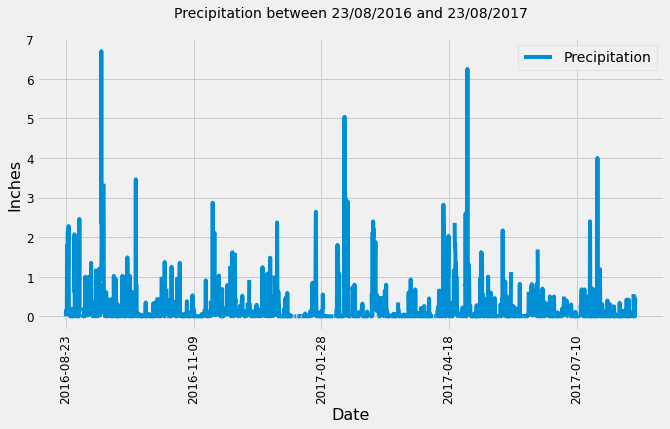

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data

plt.rcParams["figure.figsize"] = [10,5]

ax = prcp_df.plot().get_figure()

plt.xticks(rotation=90, size=12)

plt.xlabel("Date", size=16)

plt.ylabel("Inches", size=16)
plt.yticks(size=12)

plt.title("Precipitation between 23/08/2016 and 23/08/2017", size=14, y=1.05)

ax.savefig("Output/Precipitation_12_months.png", bbox_inches = 'tight')





In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()


,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Station).distinct("station").count()
print(f"The total number stations in the dataset is {total_stations}")

The total number stations in the dataset is 9


In [21]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

stations_activity = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
stations_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Most active station

most_active = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).limit(1)[0][0]

print(f"The ID of the most active station is {most_active}")

The ID of the most active station is USC00519281


In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

lowest_temp = func.min(Measurement.tobs)
highest_temp = func.max(Measurement.tobs)
average_temp = func.avg(Measurement.tobs)
min_max_avg_most_active = session.query(lowest_temp,highest_temp,average_temp).filter(Measurement.station == most_active).all()
print(f"The lowest, highest, and average temperature for the most active station, {most_active}, are {min_max_avg_most_active}")

The lowest, highest, and average temperature for the most active station, USC00519281, are [(54.0, 85.0, 71.66378066378067)]


In [24]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_obs_most_active = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active).\
    filter(Measurement.date >= previous_year).\
    order_by(Measurement.date.desc()).all()


In [25]:
# create a dataframe with temperature readings for the most active station

most_active_s_12_mnths_df = pd.DataFrame(temp_obs_most_active, columns = ["Date","Tobs"])
most_active_s_12_mnths_df

,Date,Tobs
0,2017-08-18,79.0
1,2017-08-17,76.0
2,2017-08-16,76.0
3,2017-08-15,77.0
4,2017-08-14,77.0
...,...,...
347,2016-08-27,75.0
348,2016-08-26,80.0
349,2016-08-25,80.0
350,2016-08-24,77.0


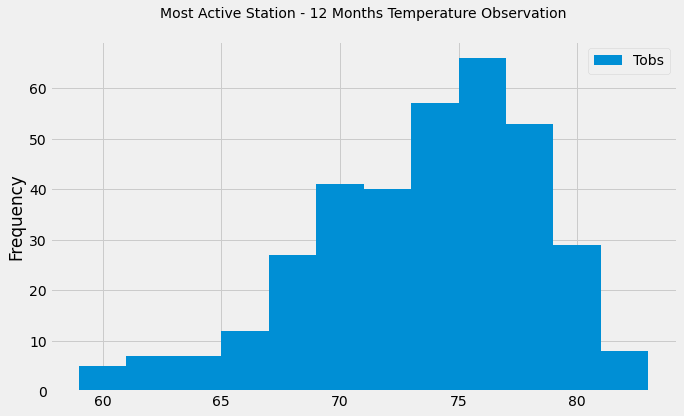

In [26]:
# plot the last 12 months temperature readings of the most active station as a histogram

plt.rcParams["figure.figsize"] = [10,6]
most_active_s_12_mnths_df.plot.hist(bins=12)

plt.title("Most Active Station - 12 Months Temperature Observation", size=14, y=1.05)

plt.savefig("Output/Most_Active_Station_12_months.png")

# Close session

In [27]:
# Close Session
session.close()